In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
movies = pd.read_csv("C:/Users/Harman PC/Desktop/example1/IMDB1/imdb_1000.csv")
movies.head()

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."


In [4]:
# Check the number of rows and columns.
# Uses 'shape' attribute.
movies.shape

(979, 6)

In [5]:
# Check the data type of each column.
# data type or dtype pointer describes - elements that are contained within the array,
movies.dtypes

star_rating       float64
title              object
content_rating     object
genre              object
duration            int64
actors_list        object
dtype: object

In [6]:
# Calculate the average movie duration.
# Using mean() function
movies.duration.mean()

120.97957099080695

In [7]:
# Sort the DataFrame by duration to find the shortest and longest movies.
# sort_values method
# Return the first n rows.
movies.sort_values('duration').head(1) 
# Return the last n rows.
movies.sort_values('duration').tail(1)

,star_rating,title,content_rating,genre,duration,actors_list
476,7.8,Hamlet,PG-13,Drama,242,"[u'Kenneth Branagh', u'Julie Christie', u'Dere..."


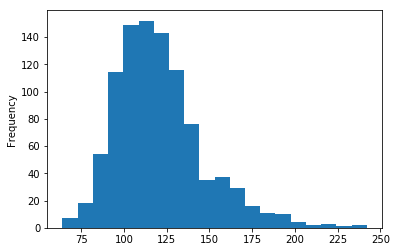

In [8]:
# Create a histogram of duration, choosing an "appropriate" number of bins.
# DataFrame.plot(kind='line')
movies.duration.plot(kind='hist', bins=20)

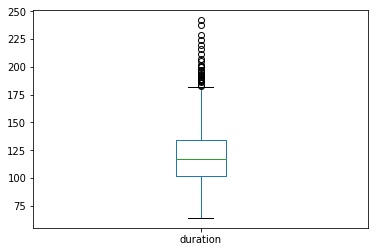

In [9]:
# Use a box plot to display that same data.
movies.duration.plot(kind='box')

In [20]:
# Count how many movies have each of the content ratings.
# movies[[‘content_rating’,’title’]].groupby(‘content_rating’).count()
# uses "Series.value_counts(normalize=False, sort=True, ascending=False, bins=None, dropna=True)" instead of groupby()
movies.content_rating.value_counts()

R            460
PG-13        189
PG           123
NOT RATED     65
APPROVED      47
UNRATED       38
G             32
NC-17          7
PASSED         7
X              4
GP             3
TV-MA          1
Name: content_rating, dtype: int64

Text(0,0.5,'Number of Movies')

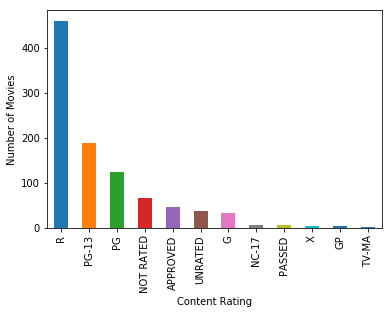

In [27]:
# Use a visualization to display that same data, including a title and x and y labels.
# plot() - arbitrary number of arguments.
movies.content_rating.value_counts().plot(kind='bar')
plt.xlabel('Content Rating')
plt.ylabel('Number of Movies')

In [31]:
# Convert the following content ratings to "UNRATED": NOT RATED, APPROVED, PASSED, GP.
# replace() - returns a copy of the string in w/c the occurrences of old have been replaced with new.
movies.content_rating.replace(['NOT RATED', 'APPROVED', 'PASSED', 'GP'], 'UNRATED', inplace=True)

In [41]:
# Convert the following content ratings to "NC-17": X, TV-MA.
movies.content_rating.replace(['X', 'TV-MA'], 'NC-17', inplace=True)

Text(0,0.5,'Number of Movies')

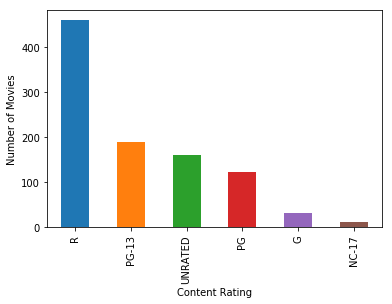

In [43]:
movies.content_rating.value_counts().plot(kind='bar')
plt.xlabel('Content Rating')
plt.ylabel('Number of Movies')

In [44]:
# Count the number of missing values in each column.
# Detect missing values (NaN in numeric arrays, None/NaN in object arrays)
# sum(iterable[, start])
movies.isnull().sum(axis=0)

star_rating       0
title             0
content_rating    3
genre             0
duration          0
actors_list       0
dtype: int64

In [50]:
# If there are missing values: examine them, then fill them in with "reasonable" values.
movies.content_rating.isnull()
# fillna(value=None, method=None, axis=None, inplace=False, limit=None, downcast=None, **kwargs)
movies.content_rating.fillna('UNRATED', inplace=True)

In [52]:
# Calculate the average star rating for movies 2 hours or longer, 
# and compare that with the average star rating for movies shorter than 2 hours.
# condition: 2 hours = 120 mins.
print('Avg. star rating for movies 2 hours or longer: ', movies[movies['duration'] >= 120]['star_rating'].mean(), 
 '\nAvg. star rating for movies shorter than 2 hours: ', movies[movies['duration'] < 120]['star_rating'].mean())

Avg. star rating for movies 2 hours or longer:  7.948898678414082 
Avg. star rating for movies shorter than 2 hours:  7.838666666666657


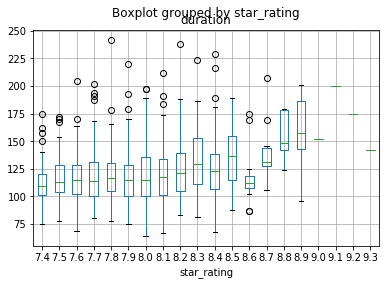

In [55]:
# Use a visualization to detect 
# whether there is a relationship between duration and star rating.
movies.boxplot(column='duration', by='star_rating');

In [57]:
# Calculate the average duration for each genre.
# mean() - to calculate average duration.
movies[['duration','genre']].groupby('genre').mean()

,duration
genre,
Action,126.485294
Adventure,134.840000
Animation,96.596774
Biography,131.844156
Comedy,107.602564
Crime,122.298387
Drama,126.539568
Family,107.500000
Fantasy,112.000000


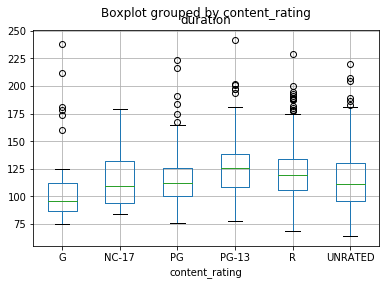

In [58]:
# Visualize the relationship between content rating and duration.
movies.boxplot(column='duration', by='content_rating')

In [60]:
# Determine the top rated movie (by star rating) for each genre.
# sort_values(by, axis=0, ascending=True, inplace=False, kind='quicksort', na_position='last')
movies.sort_values('star_rating', ascending=False).groupby('genre')['title','star_rating'].first()

,title,star_rating
genre,,
Action,The Dark Knight,9.0
Adventure,The Lord of the Rings: The Return of the King,8.9
Animation,Spirited Away,8.6
Biography,Schindler's List,8.9
Comedy,Modern Times,8.6
Crime,The Shawshank Redemption,9.3
Drama,12 Angry Men,8.9
Family,E.T. the Extra-Terrestrial,7.9
Fantasy,The City of Lost Children,7.7


In [62]:
# Check if there are multiple movies with the same title, and if so, determine if they are actually duplicates.
# duplicated(subset=None, keep='first')
result = movies[movies['title'].isin(movies[movies.duplicated(['title'])]['title'])]
result.sort_values('title')

,star_rating,title,content_rating,genre,duration,actors_list
703,7.6,Dracula,UNRATED,Horror,85,"[u'Bela Lugosi', u'Helen Chandler', u'David Ma..."
905,7.5,Dracula,R,Horror,128,"[u'Gary Oldman', u'Winona Ryder', u'Anthony Ho..."
678,7.7,Les Miserables,PG-13,Drama,158,"[u'Hugh Jackman', u'Russell Crowe', u'Anne Hat..."
924,7.5,Les Miserables,PG-13,Crime,134,"[u'Liam Neeson', u'Geoffrey Rush', u'Uma Thurm..."
466,7.9,The Girl with the Dragon Tattoo,R,Crime,158,"[u'Daniel Craig', u'Rooney Mara', u'Christophe..."
482,7.8,The Girl with the Dragon Tattoo,R,Crime,152,"[u'Michael Nyqvist', u'Noomi Rapace', u'Ewa Fr..."
662,7.7,True Grit,PG-13,Adventure,110,"[u'Jeff Bridges', u'Matt Damon', u'Hailee Stei..."
936,7.4,True Grit,PG-13,Adventure,128,"[u'John Wayne', u'Kim Darby', u'Glen Campbell']"


In [64]:
# Calculate the average star rating for each genre, but only include genres with at least 10 movies
genres = movies['genre'].value_counts()[movies['genre'].value_counts() > 10].index
# isin(values)
# Return boolean DataFrame showing whether each element in the DataFrame is contained in values.
movies[movies['genre'].isin(genres)].groupby('genre')['star_rating'].mean()

genre
Action       7.884559
Adventure    7.933333
Animation    7.914516
Biography    7.862338
Comedy       7.822436
Crime        7.916935
Drama        7.902518
Horror       7.806897
Mystery      7.975000
Name: star_rating, dtype: float64